In [109]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [110]:
# Define the function f(x, y)
def f(x, y):
    return x**2 + 2*x*torch.cos(y) + 1


In [111]:
# Define the domain of input
x = torch.linspace(-10, 10, 100, requires_grad=True)
y = torch.linspace(-10, 10, 100, requires_grad=True)


In [112]:
# Compute the function values
X, Y = torch.meshgrid(x, y)
Z = f(X, Y)


In [113]:
Z.shape

torch.Size([100, 100])

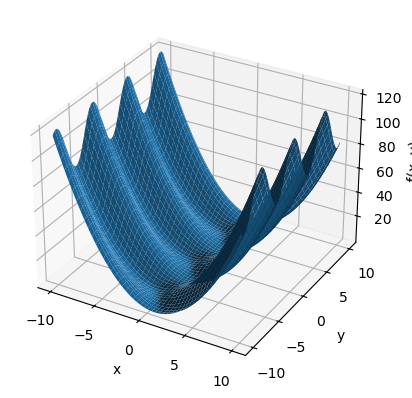

In [114]:
# plot Z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X.detach().numpy(), Y.detach().numpy(), Z.detach().numpy())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()


In [115]:
# Method 1: Compute gradients by hand
grad_x_hand = 2*X + 2*torch.cos(Y)
grad_y_hand = -2*X*torch.sin(Y)
grad_hand = torch.stack([grad_x_hand, grad_y_hand], dim=2)

In [116]:
grad_x_hand.shape, grad_y_hand.shape, grad_hand.shape

(torch.Size([100, 100]), torch.Size([100, 100]), torch.Size([100, 100, 2]))

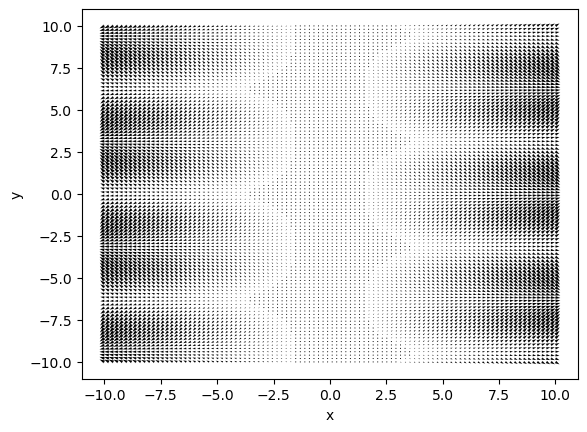

In [117]:
# plot grad_hand as a arrow field
fig, ax = plt.subplots()
ax.quiver(X.detach().numpy(), Y.detach().numpy(), grad_x_hand.detach().numpy(), grad_y_hand.detach().numpy())
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()



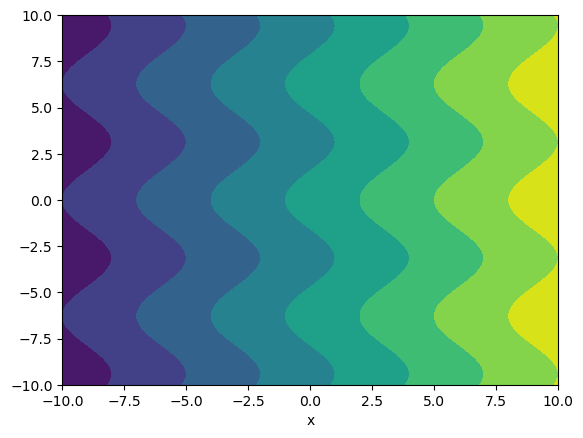

In [118]:
# plot x, y derivative
fig, ax = plt.subplots()
ax.contourf(X.detach().numpy(), Y.detach().numpy(), grad_x_hand.detach().numpy())
ax.set_xlabel('x')
plt.show()


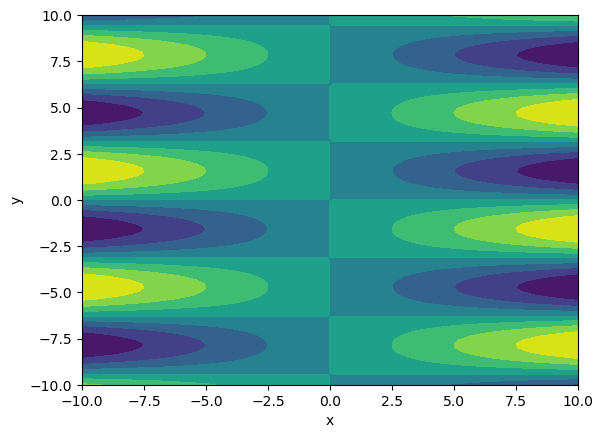

In [119]:
# plot y derivative
fig, ax = plt.subplots()
ax.contourf(X.detach().numpy(), Y.detach().numpy(), grad_y_hand.detach().numpy())
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


In [120]:
# Method 2: Compute gradients with PyTorch autograd.grad
grad_x_autograd, grad_y_autograd = torch.autograd.grad(Z.sum(), (X, Y), create_graph=True)
grad_autograd = torch.stack([grad_x_autograd, grad_y_autograd], dim=2)

In [121]:
grad_autograd.shape

torch.Size([100, 100, 2])

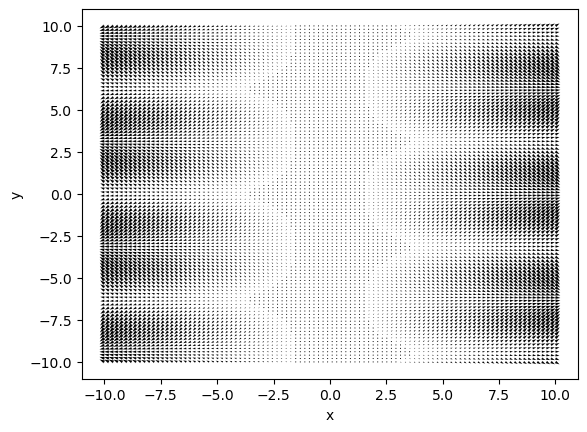

In [122]:
# plot grad_hand as a arrow field
fig, ax = plt.subplots()
ax.quiver(X.detach().numpy(), Y.detach().numpy(), grad_x_autograd.detach().numpy(), grad_y_autograd.detach().numpy())
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


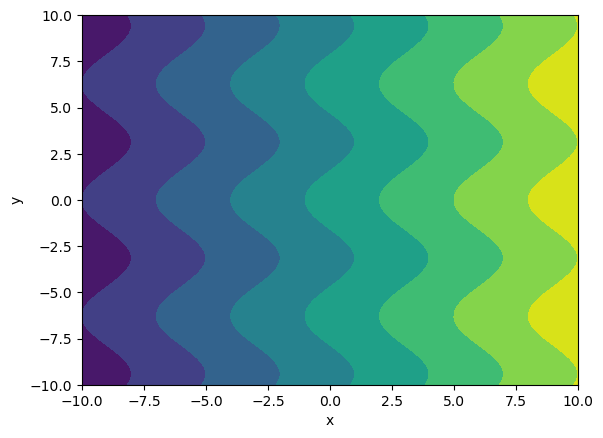

In [123]:
# plot x derivative
fig, ax = plt.subplots()
ax.contourf(X.detach().numpy(), Y.detach().numpy(), grad_x_autograd.detach().numpy())
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [124]:
Z.shape, Z[:,1].sum().shape

(torch.Size([100, 100]), torch.Size([]))

In [125]:
# Method 3: Compute gradients with .backward() called on the output of the function

grad_x_backward = []
for i in range(X.shape[1]):
    loss = Z[:, i].sum()
    loss.backward(retain_graph=True)
    grad_x_backward.append(x.grad.clone())
    x.grad.zero_()
grad_x_backward = torch.stack(grad_x_backward)

grad_y_backward = []
for i, x_value in enumerate(X):
    Z[i, :].sum().backward(retain_graph=True)
    grad_y_backward.append(y.grad.clone())
    y.grad.zero_()
grad_y_backward = torch.stack(grad_y_backward)

In [126]:
grad_x_backward.shape, grad_y_backward.shape

(torch.Size([100, 100]), torch.Size([100, 100]))

In [127]:
grad_x_backward, grad_y_backward

(tensor([[-21.6781, -21.2741, -20.8701,  ...,  17.5138,  17.9178,  18.3219],
         [-21.8623, -21.4583, -21.0542,  ...,  17.3296,  17.7336,  18.1377],
         [-21.9708, -21.5667, -21.1627,  ...,  17.2212,  17.6252,  18.0292],
         ...,
         [-21.9708, -21.5667, -21.1627,  ...,  17.2212,  17.6252,  18.0292],
         [-21.8623, -21.4583, -21.0542,  ...,  17.3296,  17.7336,  18.1377],
         [-21.6781, -21.2741, -20.8701,  ...,  17.5138,  17.9178,  18.3219]]),
 tensor([[ 10.8804,   7.2920,   3.4069,  ...,  -3.4069,  -7.2920, -10.8804],
         [ 10.6606,   7.1447,   3.3381,  ...,  -3.3381,  -7.1447, -10.6606],
         [ 10.4408,   6.9973,   3.2693,  ...,  -3.2693,  -6.9973, -10.4408],
         ...,
         [-10.4408,  -6.9973,  -3.2693,  ...,   3.2693,   6.9973,  10.4408],
         [-10.6606,  -7.1447,  -3.3381,  ...,   3.3381,   7.1447,  10.6606],
         [-10.8804,  -7.2920,  -3.4069,  ...,   3.4069,   7.2920,  10.8804]]))

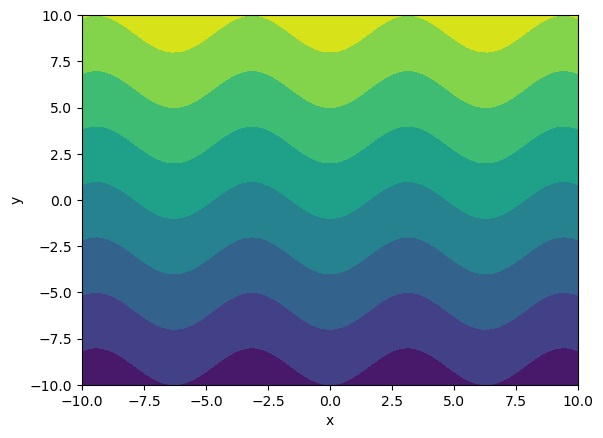

In [128]:
# plot x derivative
fig, ax = plt.subplots()
ax.contourf(X.detach().numpy(), Y.detach().numpy(), grad_x_backward.detach().numpy())
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


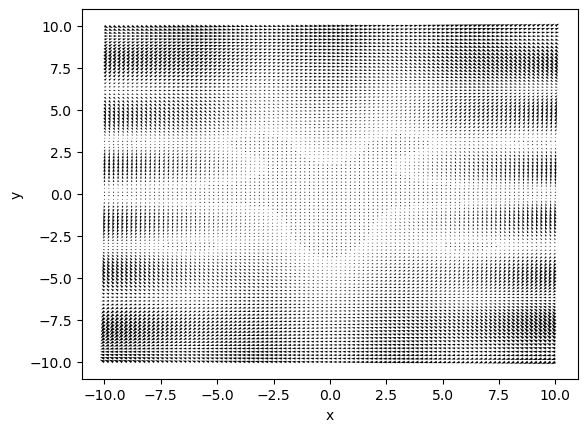

In [129]:
# plot grad_backward as a arrow field
fig, ax = plt.subplots()
ax.quiver(X.detach().numpy(), Y.detach().numpy(), grad_x_backward.detach().numpy(), grad_y_backward.detach().numpy())
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()



In [130]:
# # Compare the results
# print("Gradient computed by hand:\n", grad_hand)
# print("\nGradient computed with PyTorch autograd.grad:\n", grad_autograd)
# print("\nGradient computed with .backward():\n", grad_backward)

# # Check if gradients computed by hand and autograd match
# print("\nAre gradients computed by hand and with PyTorch autograd.grad equal?")
# print(torch.allclose(grad_hand, grad_autograd, atol=1e-5))


In [131]:
Z

tensor([[117.7814, 119.6233, 120.7077,  ..., 120.7077, 119.6233, 117.7814],
        [113.4428, 115.2475, 116.3099,  ..., 116.3099, 115.2475, 113.4428],
        [109.1858, 110.9533, 111.9939,  ..., 111.9939, 110.9533, 109.1858],
        ...,
        [ 76.9790,  75.2116,  74.1710,  ...,  74.1710,  75.2116,  76.9790],
        [ 80.5580,  78.7533,  77.6908,  ...,  77.6908,  78.7533,  80.5580],
        [ 84.2186,  82.3767,  81.2923,  ...,  81.2923,  82.3767,  84.2186]],
       grad_fn=<AddBackward0>)

In [132]:
Conv2dlayer = nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(28,16))

In [133]:
Linearlayer = nn.Linear(10, 10)

In [134]:
#create a 2D data with shape (32, 10, 28, 16)
data = torch.randn(32, 10, 28, 16)

# 32: in_channels
# 10* 28: out_channels
# 28 * 16: heights and weights

In [135]:
# reshape the data to (32*28*16, 10)
data = data.view(32*28*16, 10)